In [19]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [20]:
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from importlib import reload

import PlotTrackOfProcess
reload(PlotTrackOfProcess)
from PlotTrackOfProcess import PlotTrackOfProcess

track_tool = PlotTrackOfProcess()
check_result_with_track = False
# v_particles = [ "e-", "gamma" ]
v_particles = [ "e-" ]
# "K40", "Mn54"]
# v_particles = [  "Ge68" ]
# v_particles = [ "Cs137"]
option="_below_1keV"
v_name_files = ["user-detsim-_no_optical"+option+".root"]*len(v_particles)
v_neutron_filter = [False]*len(v_particles)
template_path = \
    "root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/Calibration_for_time_constants/{}/no_optical/{}"


In [21]:
import tqdm

dir_v_dE_dx_average = {}
dir_v_dE_dx_average_with_quench = {}
dir_v_equen = {}
dir_v_edep = {}
dir_index_evtID_of_equen = {}
for i,particle in enumerate(v_particles):
    name_file_full_path = template_path.format(particle,
                            v_name_files[i])
    # name_file_full_path = template_path.format(particle, v_name_files[i])
    track_tool.SetDataset(name_file_full_path)
    index_evtID_of_equen = track_tool.GetEvtIDOfDepTree()
    entries = track_tool.GetTotalEntries()
    v_dE_dx = []
    v_dE_dx_with_quench = []
    # v_equen = track_tool.Get_v_Equen(filter_n_capture=(particle=="neutron" or particle=="AmC"))
    # v_edep = track_tool.Get_v_Edep(filter_n_capture=(particle=="neutron" or particle=="AmC"))
    v_equen = track_tool.Get_v_Equen(filter_n_capture=False)
    v_edep = track_tool.Get_v_Edep(filter_n_capture=False)
    # for j_entry in tqdm.trange(entries)[:1000]:
    # entries = 20000
    n_figure_track = 0
    for j_entry in tqdm.trange(entries):
        # equen = track_tool.GetEquen(j_entry, filter_n_capture=True)
        dE_dx_average = track_tool.Get_Average_dE_dx(j_entry)
        dE_dx_average_with_quench = track_tool.Get_Average_dE_dx(j_entry,times_quench_factor=True)
        v_dE_dx.append(dE_dx_average)
        v_dE_dx_with_quench.append(dE_dx_average_with_quench)

        # if n_figure_track>10 and check_result_with_track:
        #     break
    dir_v_dE_dx_average[particle] = np.array(v_dE_dx)[index_evtID_of_equen]
    dir_v_equen[particle] = v_equen
    dir_v_dE_dx_average_with_quench[particle] = np.array(v_dE_dx_with_quench)[index_evtID_of_equen]
    dir_v_edep[particle] = v_edep
    dir_index_evtID_of_equen[particle] = index_evtID_of_equen

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:02<00:00, 5977.24it/s]


Text(0.5, 0, '$E_{quench}$ [ MeV ]')

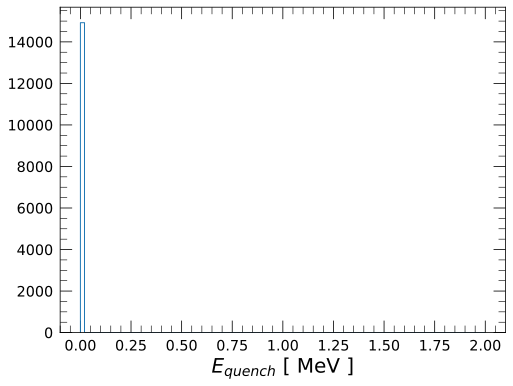

In [22]:
for key in dir_v_equen.keys():
    plt.hist(dir_v_equen[key],histtype="step",bins=np.linspace(0,2,100),
             label=key)
plt.xlabel("$E_{quench}$ [ MeV ]")

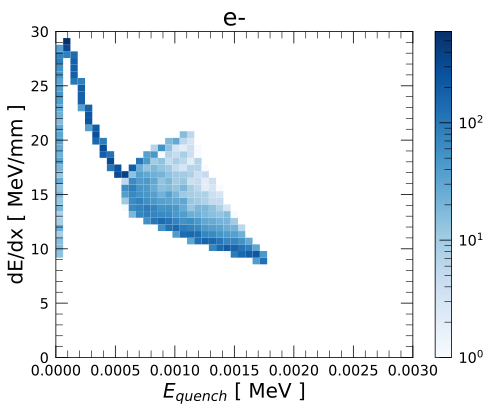

In [23]:
x_max = 0.003
y_max = 30
from matplotlib.colors import LogNorm
dir_hist2d = {}
for key in dir_v_equen.keys():
    plt.figure()
    dir_hist2d[key] = plt.hist2d(dir_v_equen[key],dir_v_dE_dx_average_with_quench[key],
               bins=(np.linspace(0,x_max,50),np.linspace(0,y_max,50)),
               cmap="Blues",norm=LogNorm())
    plt.xlabel("$E_{quench}$ [ MeV ]")
    plt.ylabel("dE/dx [ MeV/mm ]")
    plt.colorbar()
    plt.title(key)
    plt.savefig(f"/afs/ihep.ac.cn/users/l/luoxj/junofs_500G/DSNB_component_fitting/timing_constant_study/calibration_for_dE_dx/e-/{key}_E_{x_max}_dE_dx_{y_max}"+option+".png")

In [24]:
plt.figure()
from HistTools import GetHist2DProjectionY
# print(dir_hist2d["e-"][0])
(x,y) = GetHist2DProjectionY(dir_hist2d["e-"][0], dir_hist2d["e-"][1], dir_hist2d["e-"][2],
                     plot=True)
print("x_center:\t", x)
print("y:\t", y)

ZeroDivisionError: Weights sum to zero, can't be normalized

<Figure size 576x432 with 0 Axes>